# Diabetes diagnosis

In [2]:
import pandas as pd
import arff
import seaborn as sns
from sklearn import tree
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Load dataset

In [3]:
df_path = "../datasets/diabetes.arff"

def get_df(path):
    with open(df_path, 'r') as file:
        arff_data = arff.load(file)
    # Convert to pandas DataFrame
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    return df

df = get_df(df_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


## Apply f_classif

In [4]:
y = df["Outcome"]
X = df.drop(columns="Outcome")

f_scores, p_values = f_classif(X, y)

# Criar um DataFrame para exibir as features e seus F-scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores})

# Ordenar pelo F-score (maior -> menor)
feature_scores = feature_scores.sort_values(by='F-score', ascending=False)

# Identificar a melhor (maior F-score) e pior (menor F-score) variável
best_feature = feature_scores.iloc[0]['Feature']
worst_feature = feature_scores.iloc[-1]['Feature']


## Plot the results

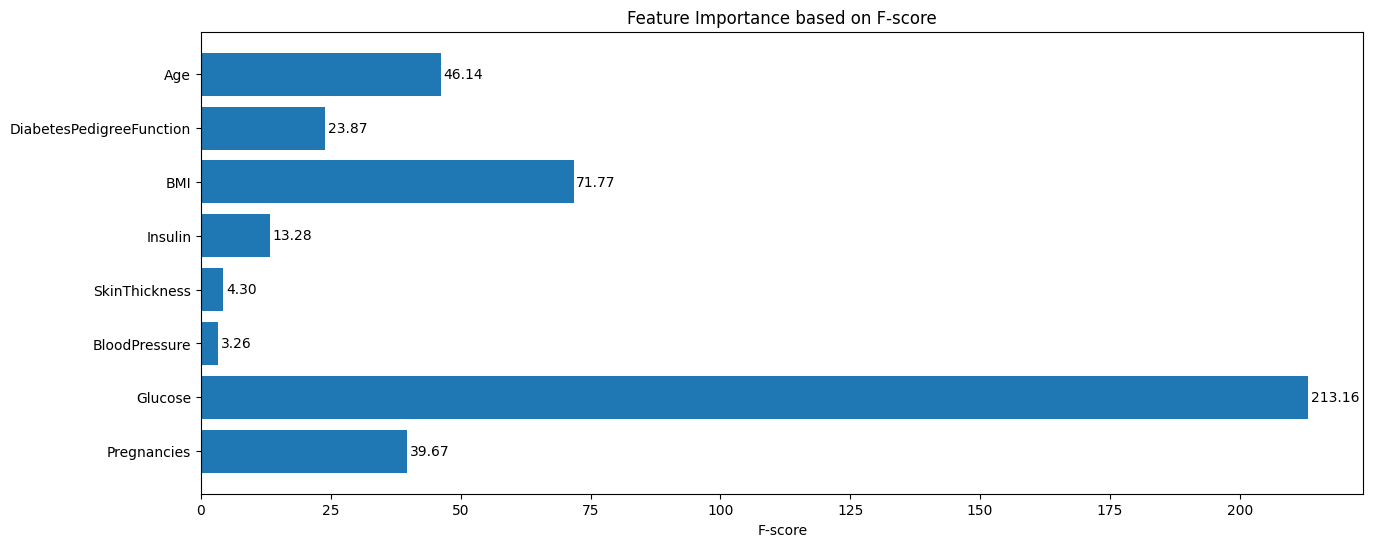

In [5]:
features = X.columns
plt.figure(figsize=(15, 6))
bars = plt.barh(features, f_scores, align='center')

#Adicionar o valor do F-score ao lado de cada barra
for bar, f_score in zip(bars, f_scores):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{f_score:.2f}', 
             va='center', ha='left', fontsize=10)


plt.xlabel('F-score')
plt.title('Feature Importance based on F-score')
plt.show()

## Class-conditional Probabiliity Density Functions ##


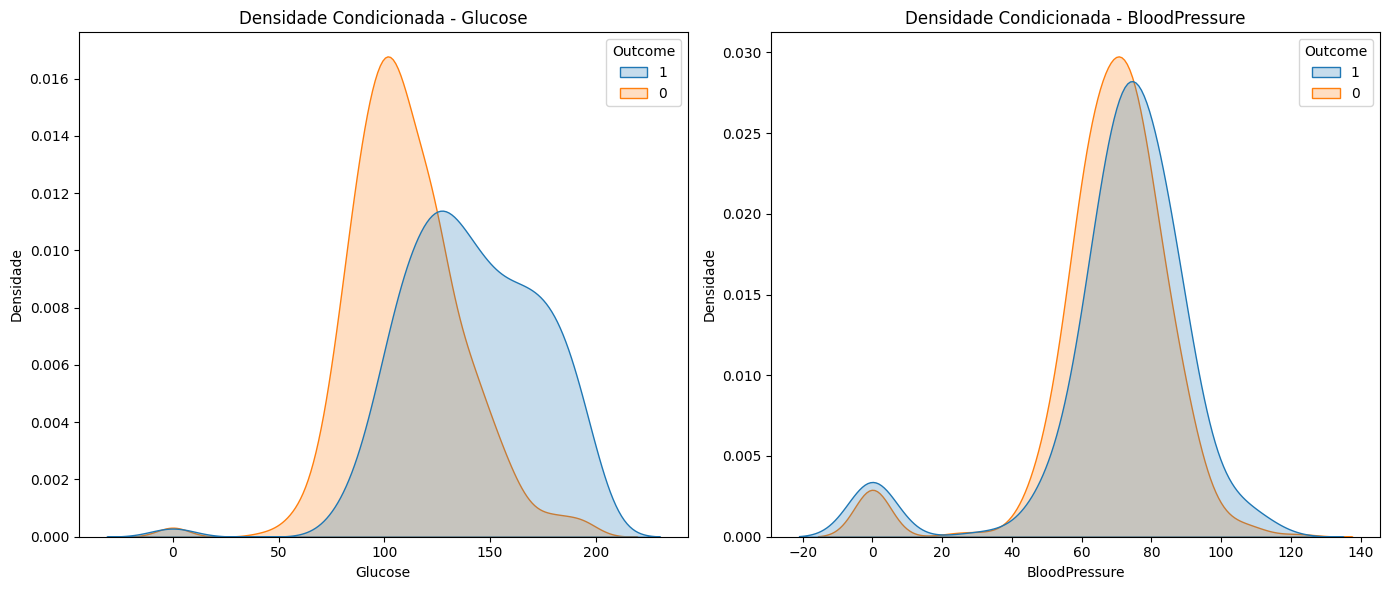

In [6]:
# Plotar a densidade para a melhor variável discriminativa
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(x=df[best_feature], hue=y, fill=True, common_norm=False)
plt.title(f'Densidade Condicionada - {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Densidade')

# Plotar a densidade para a pior variável discriminativa
plt.subplot(1, 2, 2)
sns.kdeplot(x=df[worst_feature], hue=y, fill=True, common_norm=False)
plt.title(f'Densidade Condicionada - {worst_feature}')
plt.xlabel(worst_feature)
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()


## Decision tree classifier ##

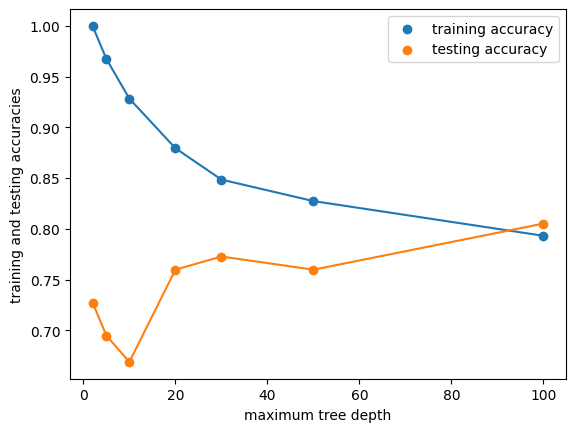

In [12]:
tests_acc_avg = [] 
trains_acc_avg = [] 
min_sampl_splits = [2,5,10,20,30,50,100] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

for i in min_sampl_splits: 
    for j in range(10): 
        tests_acc = [] 
        trains_acc = [] 
        clf = tree.DecisionTreeClassifier(min_samples_split=i) 
        clf.fit(X_train,y_train) 
        tests_acc.append(clf.score(X_test,y_test)) #getting the test accuracy for each tree of this depth 
        trains_acc.append(clf.score(X_train, y_train)) #getting the training accuracy for each tree of this depth 
    tests_acc_avg.append(sum(tests_acc) / len(tests_acc)) 
    trains_acc_avg.append(sum(trains_acc) / len(trains_acc))

#graph 
 
plt.scatter(min_sampl_splits, trains_acc_avg, label = 'training accuracy')
plt.plot(min_sampl_splits, trains_acc_avg) 
plt.scatter(min_sampl_splits, tests_acc_avg, label = 'testing accuracy') 
plt.plot(min_sampl_splits, tests_acc_avg)
plt.legend() 
plt.xlabel('maximum tree depth') 
plt.ylabel('training and testing accuracies') 
plt.show() 
#model = DecisionTreeClassifier(random_state=1, min_samples_split=100)
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

## Testing the results ##

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8051948051948052
Precision: 0.802332361516035
Recall: 0.8051948051948052
F1 Score: 0.8024402068519716
Confusion Matrix:
[[87 12]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.76      0.67      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



## Max Depth 3 Tree ##

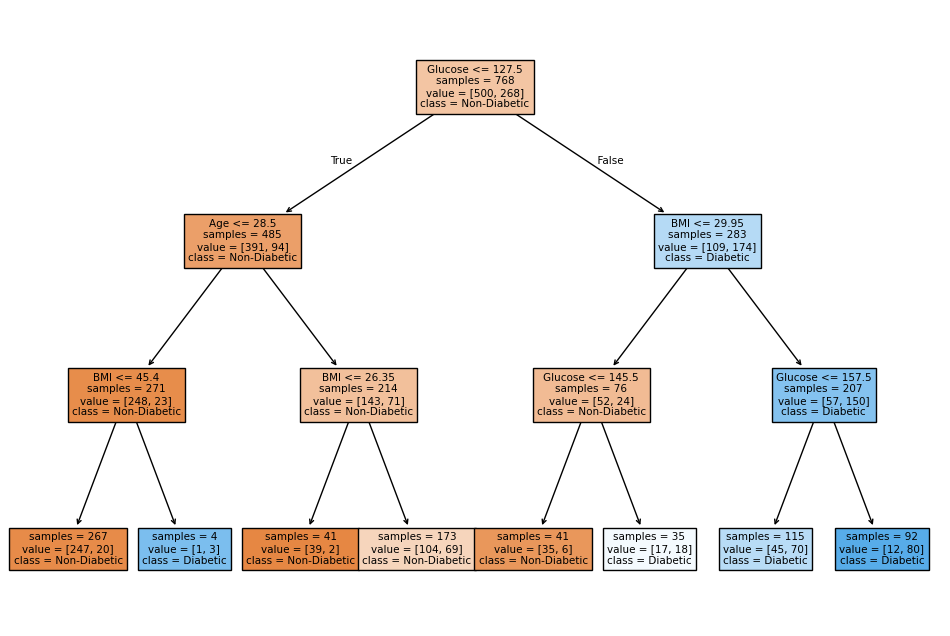

In [19]:
# Treinar 
model_depth3 = DecisionTreeClassifier(random_state=1, max_depth=3)
model_depth3.fit(X, y)

# Plotar a árvore de decisão
plt.figure(figsize=(12, 8))
tree.plot_tree(model_depth3, filled=True, feature_names=X.columns, class_names=["Non-Diabetic", "Diabetic"], impurity = False)
plt.show()

In [17]:
# Probs Condicionais 
probs = model_depth3.predict_proba(X)
print("Probabilidades condicionais:\n", probs)

Probabilidades condicionais:
 [[0.39130435 0.60869565]
 [0.60115607 0.39884393]
 [0.48571429 0.51428571]
 ...
 [0.95121951 0.04878049]
 [0.60115607 0.39884393]
 [0.92509363 0.07490637]]
